<a href="https://colab.research.google.com/github/Sai230803/Car-purchase-prediction-using-Linear-Regression-Ridge-and-Lasso/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ridge, Laso

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df=pd.read_csv("/content/car_purchasing.csv",encoding='latin')

In [ ]:
df1=df.copy()

In [ ]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
corrMatrix=df.corr(numeric_only=True)
corrMatrix

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


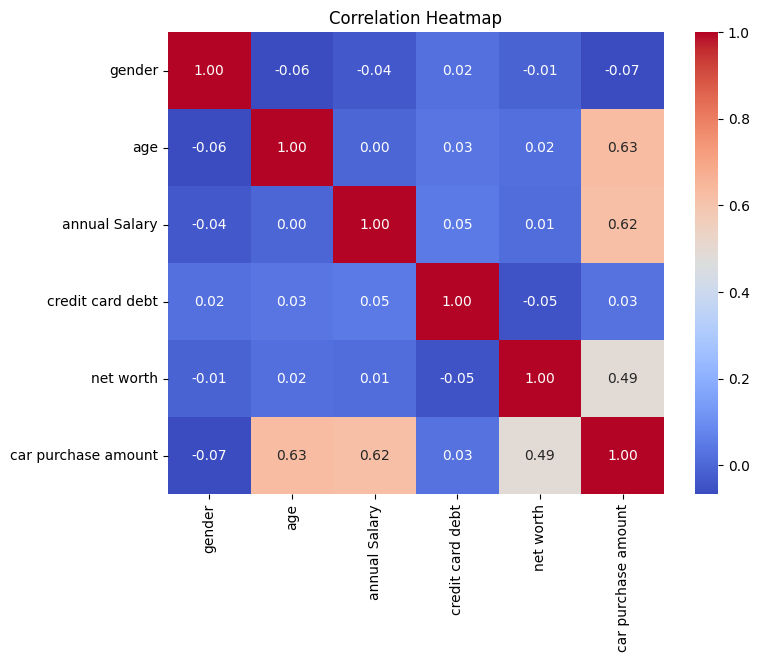

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corrMatrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


Target variable:
1. Car Purchase Amount

Input variables:
1. annual Salary  
2. credit card debt  
3. net worth

Unwanted variables:
1. customer name
2. customer e-mail    
3. country
4. gender
5. age

#Drop unwanted columns

In [ ]:
df.drop(['customer name','customer e-mail','country','gender','age'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annual Salary        500 non-null    float64
 1   credit card debt     500 non-null    float64
 2   net worth            500 non-null    float64
 3   car purchase amount  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [ ]:
df2=df.copy()
df2.head()

,annual Salary,credit card debt,net worth,car purchase amount
0,62812.09301,11609.380910,238961.2505,35321.45877
1,66646.89292,9572.957136,530973.9078,45115.52566
2,53798.55112,11160.355060,638467.1773,42925.70921
3,79370.03798,14426.164850,548599.0524,67422.36313
4,59729.15130,5358.712177,560304.0671,55915.46248


2.1 Check the shape of the dataframe.

In [ ]:
df.shape

(500, 4)

2.2 Check column data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annual Salary        500 non-null    float64
 1   credit card debt     500 non-null    float64
 2   net worth            500 non-null    float64
 3   car purchase amount  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


2.3 Check missing values

In [ ]:
df.isnull().sum()

,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


2.4 Check basic statistics

In [ ]:
df.describe()

,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000
mean,62127.239608,9607.645049,431475.713625,44209.799218
std,11703.378228,3489.187973,173536.756340,10773.178744
min,20000.000000,100.000000,20000.000000,9000.000000
25%,54391.977195,7397.515792,299824.195900,37629.896040
50%,62915.497035,9655.035568,426750.120650,43997.783390
75%,70117.862005,11798.867487,557324.478725,51254.709517
max,100000.000000,20000.000000,1000000.000000,80000.000000


3. Exploratory Data Analysis (EDA)

3.1 Distribution of variables

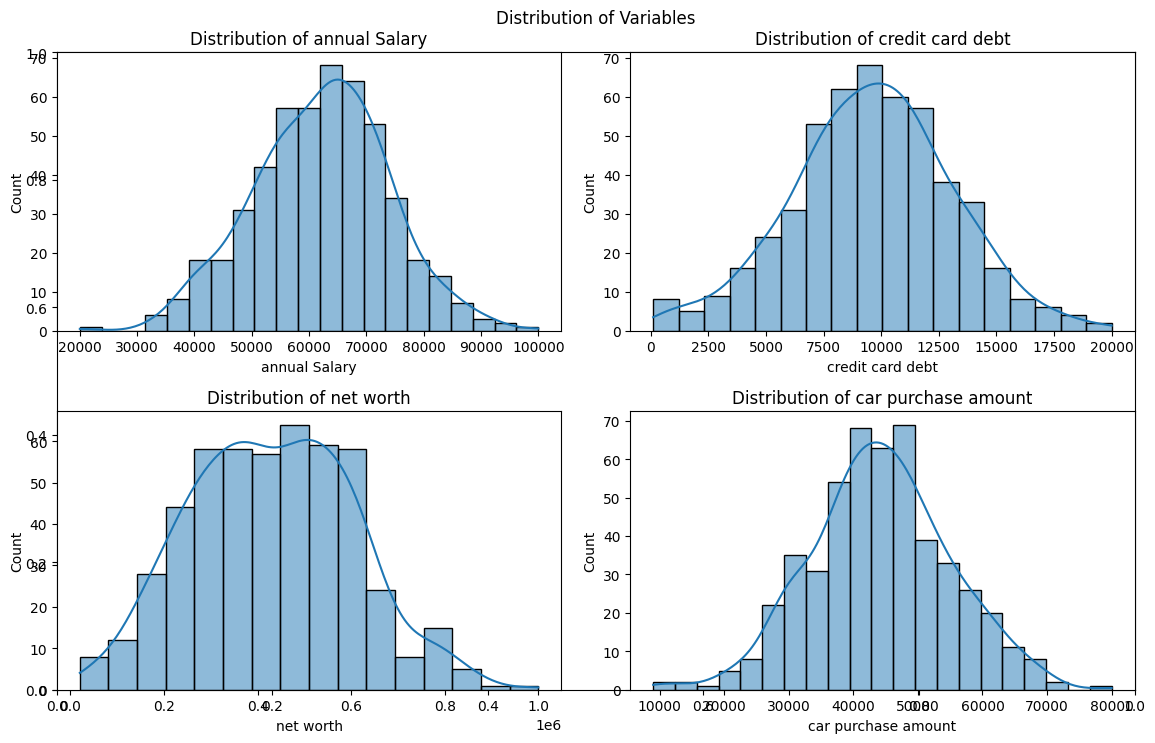

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Variables\n')

for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


3.2 Relationship between features and target

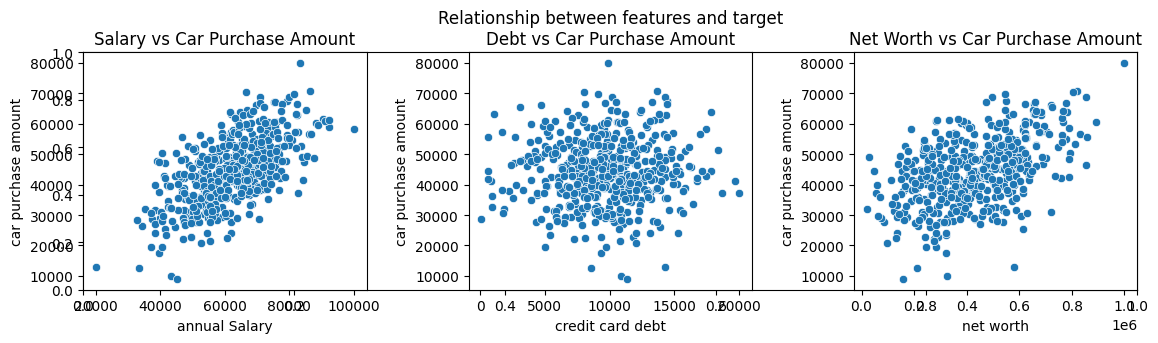

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Relationship between features and target\n')

plt.subplot(1,3,1)
sns.scatterplot(x=df['annual Salary'], y=df['car purchase amount'])
plt.title('Salary vs Car Purchase Amount')

plt.subplot(1,3,2)
sns.scatterplot(x=df['credit card debt'], y=df['car purchase amount'])
plt.title('Debt vs Car Purchase Amount')

plt.subplot(1,3,3)
sns.scatterplot(x=df['net worth'], y=df['car purchase amount'])
plt.title('Net Worth vs Car Purchase Amount')

plt.tight_layout()
plt.show()

3.3 Correlation analysis

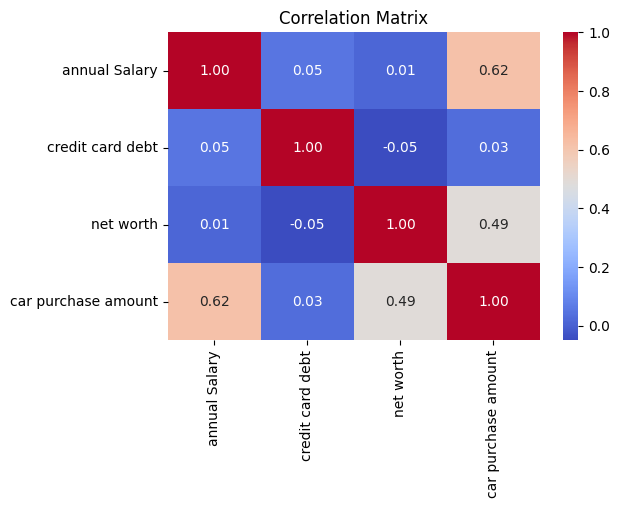

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


3.4 Outlier detection

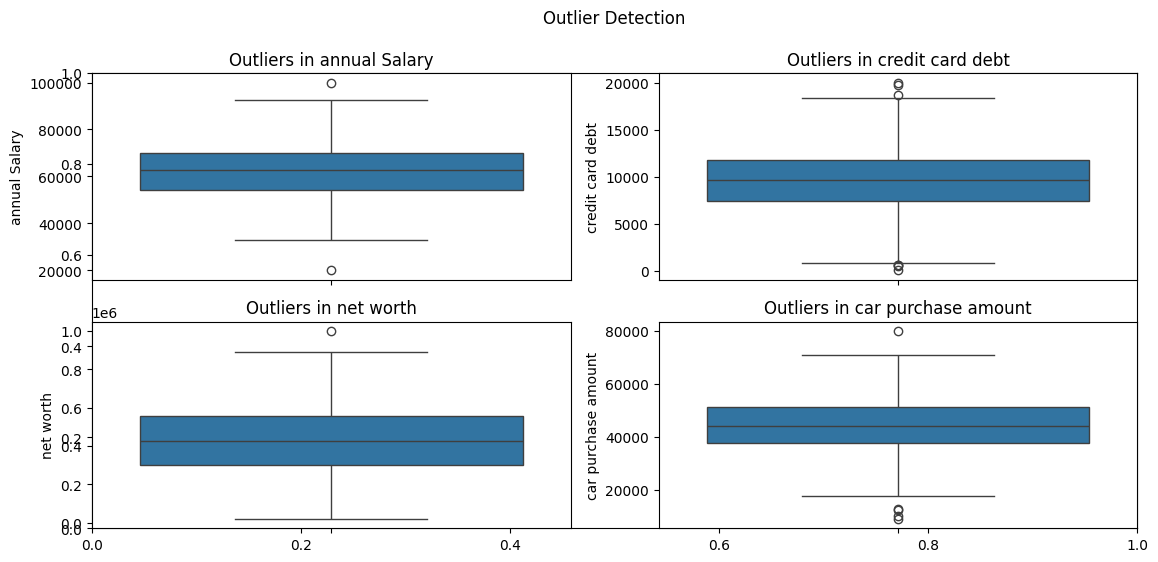

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Outlier Detection\n\n')

for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


#3. Feature Scaling

Standardization or normalization

In [ ]:
X=df.iloc[:, :-1] #Select Feature Variables (Input – X)
#For X in df, it locates [all the rows, all the columns except last column]
y=df.iloc[:, -1] # Select Target Variable (Output - y)
#For y in df, it locates [all the rows in specified column, last column]

In [ ]:
from sklearn.preprocessing import MinMaxScaler #This tool performs feature scaling
scaler=MinMaxScaler() #Python scales the values 0-1 in df from each column

In [ ]:
X_scaled = scaler.fit_transform(X)
#Finds min value, max value and fit to in the 0 to 1 range

#4️ Train-Test Split

Split data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
#Spliting tool splits the dataset for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

In [ ]:
X_train.shape

(400, 3)

In [ ]:
X_test.shape

(100, 3)

In [ ]:
y_train.shape

(400,)

In [ ]:
y_test.shape

(100,)

#4. Model Training (Linear Regression)

Fit the model on training data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model=LinearRegression() #Create the model

In [ ]:
lr_model.fit(X_train, y_train) #Train (fit) the model using train datasets

LinearRegression()

In [ ]:
lr_model.score(X_train, y_train)

0.6114961712620739

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, lr_pred)
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)

print("R^2 Score:", r2)
print("Mean Absolute Error(MAE):", mae)
print("Mean Squared Error(MSE):", mse)
print("Root Mean Squared Error(RMSE):", rmse)

R^2 Score: 0.6077713928939262
Mean Absolute Error(MAE): 5283.379866703924
Mean Squared Error(MSE): 42350161.96124286
Root Mean Squared Error(RMSE): 6507.70020523709


In [ ]:
# Consider cars above 50000 as "high purchase" = 1, else 0
y_test_binary = (y_test > 50000).astype(int)
lr_pred_binary = (lr_pred > 50000).astype(int)

[[65  2]
 [13 20]]


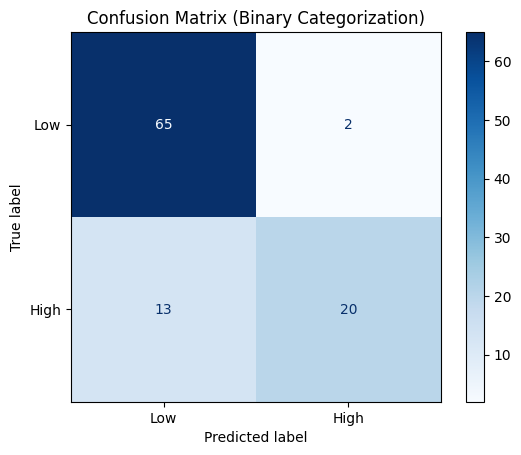

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_binary, lr_pred_binary)
print(cm)

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Binary Categorization)")
plt.show()

Visualize Actual vs Predicted

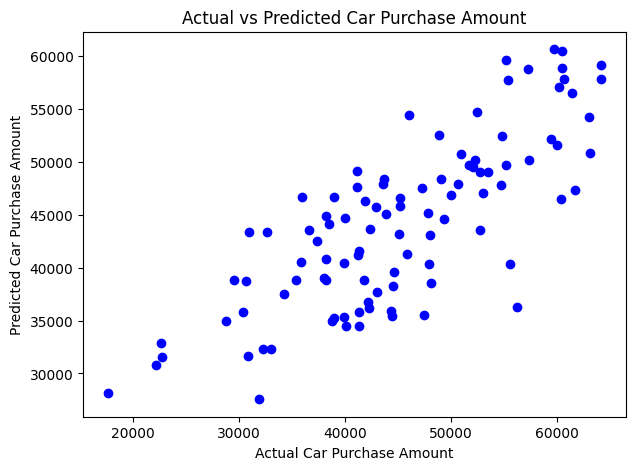

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, lr_pred, color='blue')
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Actual vs Predicted Car Purchase Amount")
plt.show()


Add Regression Line (Better understanding)

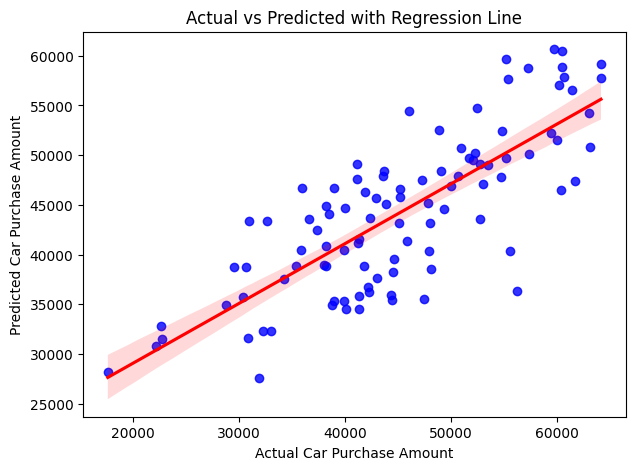

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=y_test, y=lr_pred, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Actual vs Predicted with Regression Line")
plt.show()


Visualize Residuals

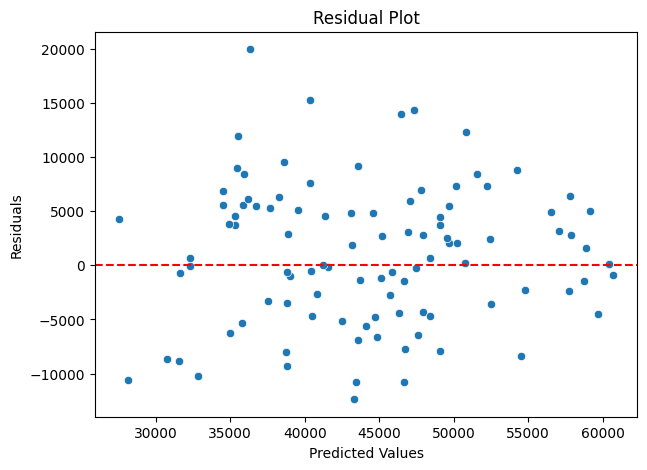

In [ ]:
residuals = y_test - pd.Series(lr_pred, index=y_test.index)

plt.figure(figsize=(7,5))
sns.scatterplot(x=lr_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Feature Importance

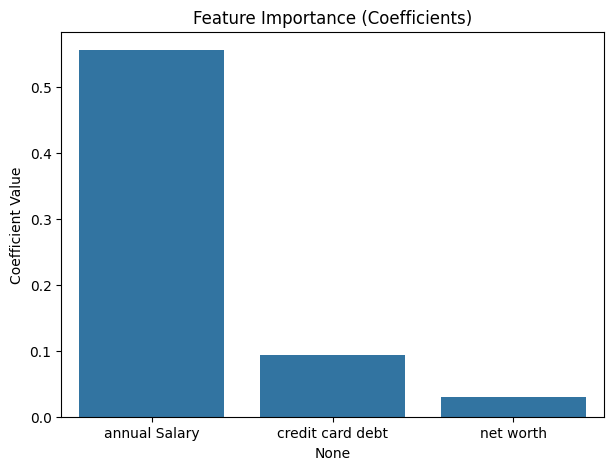

In [ ]:
features = X.columns
coefficients = lr_model.coef_.flatten()

plt.figure(figsize=(7,5))
sns.barplot(x=features, y=coefficients)
plt.title("Feature Importance (Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Features (X) and target (y)
X = df[['annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount'].values.reshape(-1,1)

# Optional: scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

# Train
lr.fit(x_train, y_train)
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)


Lasso(alpha=0.01)

In [ ]:
# Predictions (1D arrays)
lr_pred = lr.predict(x_test).ravel()
ridge_pred = ridge.predict(x_test).ravel()
lasso_pred = lasso.predict(x_test).ravel()
y_test = y_test.ravel()


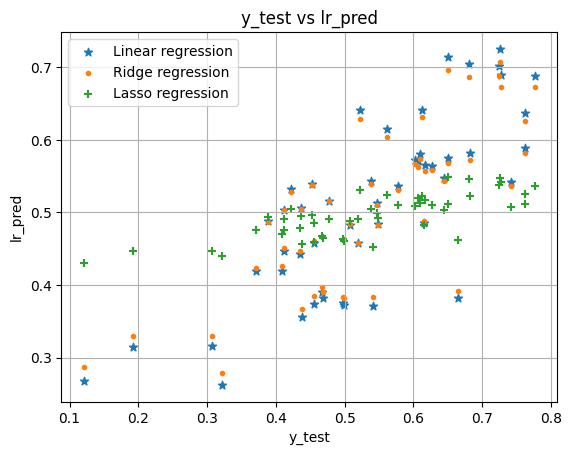

In [ ]:
plt.scatter(y_test, lr_pred, marker='*', label='Linear regression')
plt.scatter(y_test, ridge_pred, marker='.', label='Ridge regression')
plt.scatter(y_test, lasso_pred, marker='+', label='Lasso regression')

plt.title('y_test vs lr_pred')
plt.xlabel('y_test')
plt.ylabel('lr_pred')

plt.grid()
plt.legend()
plt.show()